In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## importing dataset

In [4]:
df = pd.read_csv('./data//BTC-USD(1).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.shape

(2747, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2.747000e+03
mean,11668.600272,11981.034949,11325.596907,11682.892098,11682.892098,1.484704e+10
std,16323.683853,16759.568657,15825.584507,16330.191582,16330.191582,1.994819e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.122009,611.894501,606.309479,609.234009,609.234009,8.161285e+07
50%,6371.850098,6500.870117,6285.629883,6376.709961,6376.709961,5.227550e+09
75%,10728.271485,10992.468751,10412.890137,10755.395019,10755.395019,2.500517e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2747 non-null   object 
 1   Open       2747 non-null   float64
 2   High       2747 non-null   float64
 3   Low        2747 non-null   float64
 4   Close      2747 non-null   float64
 5   Adj Close  2747 non-null   float64
 6   Volume     2747 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.4+ KB


In [9]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((2747, 7), (2747, 7))

In [10]:
df = df.drop(['Adj Close'], axis=1)

In [11]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Feature Engineering


In [14]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date']) 

df.head()


,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


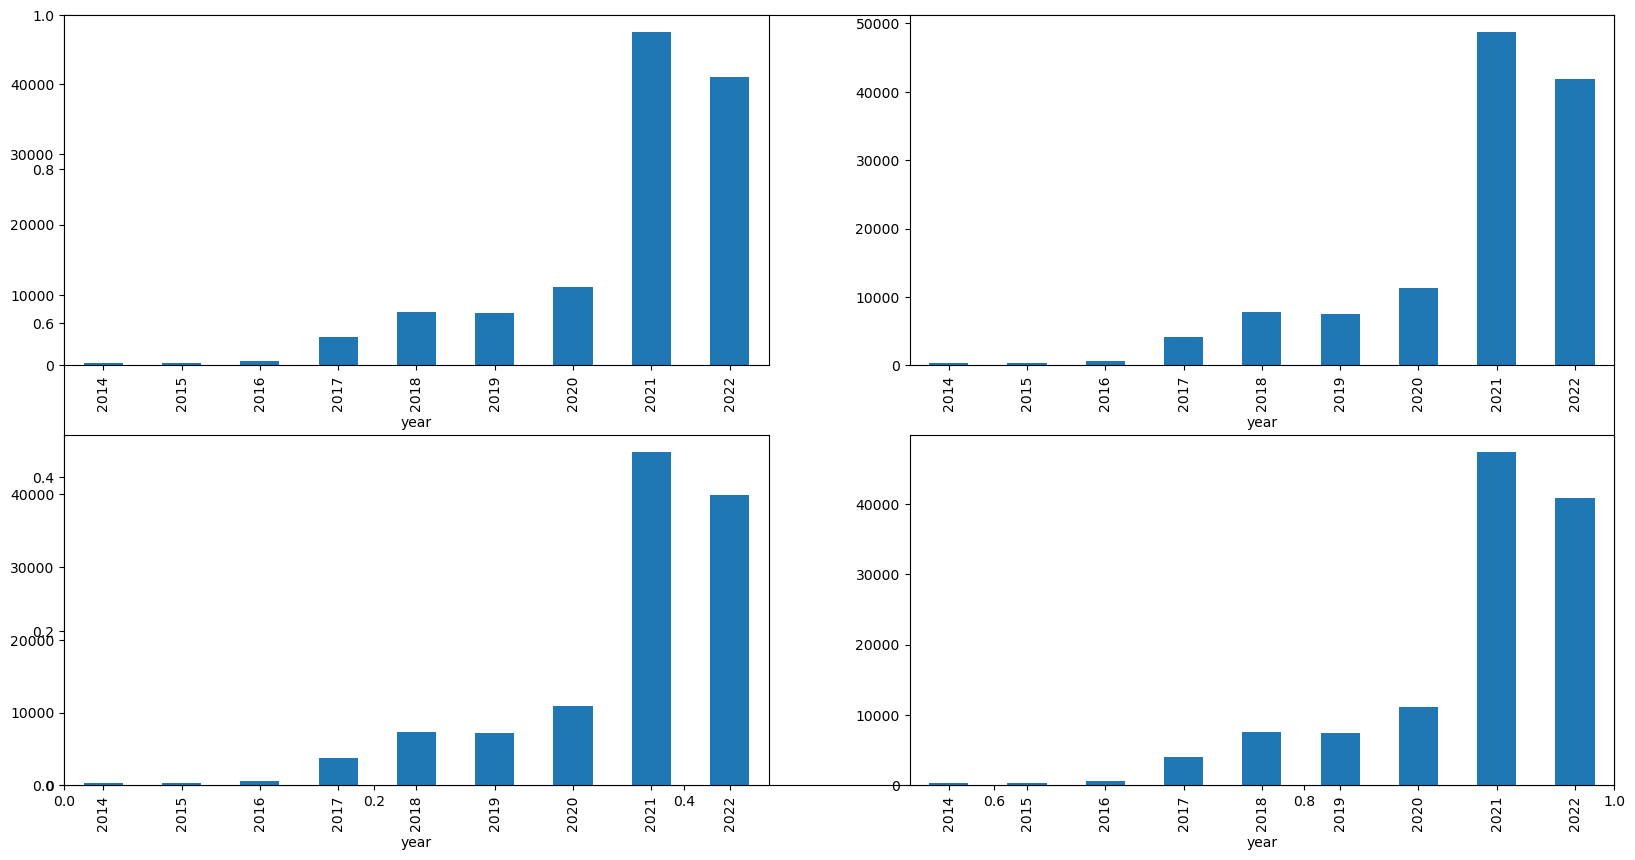

In [15]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [16]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [27]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,open-close,low-high,target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1,8.529999,-15.752014,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1,32.419983,-43.755981,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1,29.307007,-43.302978,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1,-14.230988,-33.412994,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1,9.263977,-19.244995,1


In [32]:
df['daily_return'] = df['Close'].pct_change()
df['volatility'] = df['High'] - df['Low']
df['ma_7'] = df['Close'].rolling(7).mean()  # 7-day moving average
df.head(10)

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,open-close,low-high,target,daily_return,volatility,ma_7
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1,8.529999,-15.752014,0,NaN,15.752014,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1,32.419983,-43.755981,0,-0.071926,43.755981,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1,29.307007,-43.302978,1,-0.069843,43.302978,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1,-14.230988,-33.412994,0,0.035735,33.412994,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1,9.263977,-19.244995,1,-0.024659,19.244995,NaN
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600,2014,9,22,1,-3.052002,-9.785980,1,0.008352,9.785980,NaN
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,45099500,2014,9,23,1,-33.698975,-45.360016,0,0.083647,45.360016,417.462572
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,30627700,2014,9,24,1,12.546020,-14.980011,0,-0.028881,14.980011,412.586997
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,26814400,2014,9,25,1,11.582001,-14.052002,0,-0.027483,14.052002,410.748997
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,21460800,2014,9,26,1,7.003998,-14.928985,0,-0.017370,14.928985,412.124568


In [33]:
print("Class Distribution:\n", df['target'].value_counts())

Class Distribution:
 target
1    1486
0    1261
Name: count, dtype: int64


In [23]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)
#We do not use train test split, rather use the first 70% data to train and last 30% to test
#X_train, X_valid, Y_train, Y_valid = X_train, X_valid, Y_train, Y_valid = features[:len(features)//7],features[len(features)//7:],target[:len(features)//7],target[len(features)//7:]
split_index = int(len(features) * 0.7)
X_train = features[:split_index]
X_valid = features[split_index:]
Y_train = target[:split_index]
Y_valid = target[split_index:]

In [35]:
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
# === ADD HYPERPARAMETER TUNING HERE ===
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# 1. Initialize base model
model = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    tree_method='hist'  # Better for large datasets
)

# 2. Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],       # Start with fewer options
    'max_depth': [3, 4],                # Typical range for financial data
    'n_estimators': [100, 200],         # Number of trees
    'subsample': [0.8, 1.0],            # Prevent overfitting
    'gamma': [0, 0.1],                  # Regularization
    'colsample_bytree': [0.8, 1.0]
}

# 3. Use time-series aware cross-validation
tscv = TimeSeriesSplit(n_splits=3)  # Maintains temporal order

# 4. Set up grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=tscv,
    scoring='roc_auc',          # Optimize for AUC-ROC
    verbose=2,                  # Shows progress
    n_jobs=-1                   # Use all CPU cores
)

# 5. Run tuning on TRAINING DATA ONLY
grid_search.fit(X_train, Y_train)

# 6. Get best model
best_model = grid_search.best_estimator_

# === CONTINUE WITH EVALUATION ===
# Use the best model for validation
y_pred = best_model.predict(X_valid)
y_proba = best_model.predict_proba(X_valid)[:, 1]

# (Keep your existing evaluation code here)
print("Accuracy:", accuracy_score(Y_valid, y_pred))
# ... rest of your metrics ...

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Accuracy: 0.4703030303030303


In [36]:
print("Best parameters:", grid_search.best_params_)
print("Best validation AUC:", grid_search.best_score_)

# Visualize parameter performance
results = pd.DataFrame(grid_search.cv_results_)
print(results[['params', 'mean_test_score', 'std_test_score']])

Best parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Best validation AUC: 0.5113296023773365
                                               params  mean_test_score  \
0   {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...         0.509810   
1   {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...         0.498174   
2   {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...         0.507156   
3   {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...         0.494960   
4   {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...         0.507353   
..                                                ...              ...   
59  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learn...         0.495801   
60  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learn...         0.511330   
61  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learn...         0.504303   
62  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learn...         0.500099   
63  {'colsam

## Model Development and Evaluation

In [28]:
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Initialize XGBoost Classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    random_state=42
)

# Train the model
model.fit(X_train, Y_train)

# Make predictions
y_pred = model.predict(X_valid)
y_proba = model.predict_proba(X_valid)[:, 1]  # For AUC-ROC

Accuracy: 0.48
Precision: 0.5083179297597042
Recall: 0.6278538812785388
F1-Score: 0.5617977528089888
ROC-AUC: 0.47316024211532337

Confusion Matrix:
[[121 266]
 [163 275]]

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.31      0.36       387
           1       0.51      0.63      0.56       438

    accuracy                           0.48       825
   macro avg       0.47      0.47      0.46       825
weighted avg       0.47      0.48      0.47       825



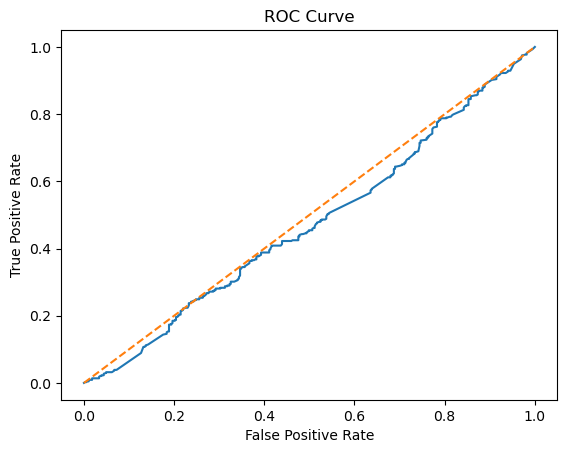

In [29]:
# Basic metrics
print("Accuracy:", accuracy_score(Y_valid, y_pred))
print("Precision:", precision_score(Y_valid, y_pred))
print("Recall:", recall_score(Y_valid, y_pred))
print("F1-Score:", f1_score(Y_valid, y_pred))
print("ROC-AUC:", roc_auc_score(Y_valid, y_proba))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_valid, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_valid, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_valid, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

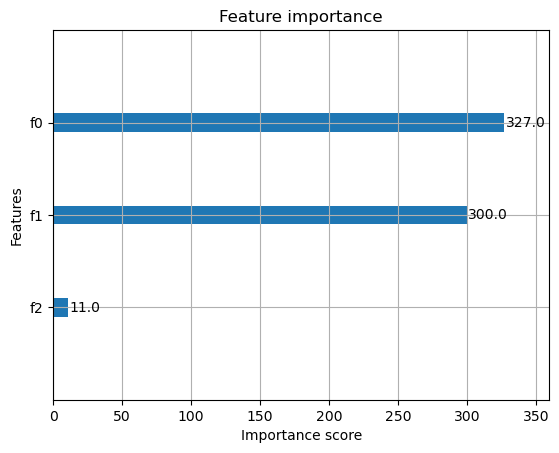

In [30]:
# Plot feature importance
xgb.plot_importance(model)
plt.show()

In [ ]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5140618722378465
Validation Accuracy :  0.5415383526246859

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.48145099306513883
Validation Accuracy :  0.4910799617712648

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Train

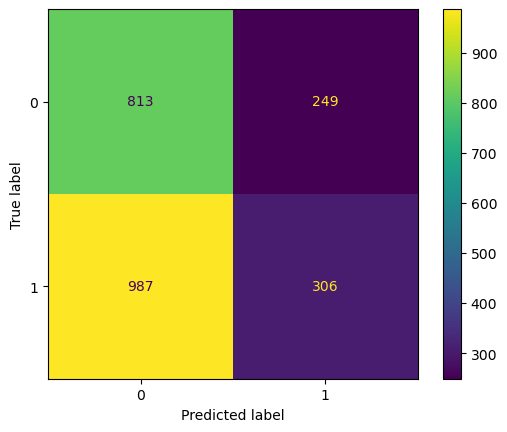

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()


## Conclusion:
We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply guessing with a probability of 50%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.